<a href="https://colab.research.google.com/github/EricSiq/Supervised-Machine-Learning-Lab/blob/main/SML_KNearest_Neighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score


In [18]:
warnings.filterwarnings('ignore')

iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

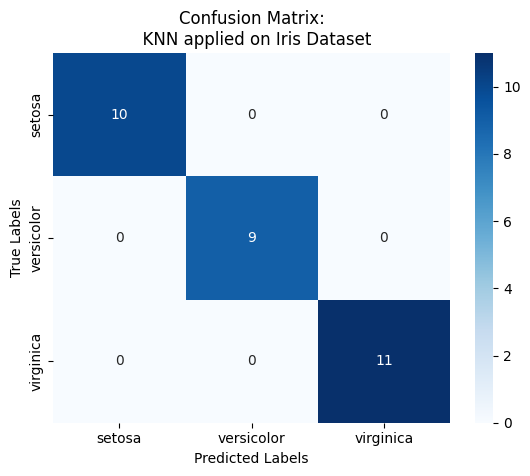

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
cm=confusion_matrix(y_test,knn.predict(x_test))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix:\n  KNN applied on Iris Dataset")
plt.show()
y_pred=knn.predict(x_test)

In [25]:
# Compute F1-score (weighted for multi-class classification)
# f1 = f1_score(y_test, y_pred, average='weighted')

# Loop through different values of n_neighbors
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1-score for k={k}: {f1}")


F1-score for k=1: 1.0
F1-score for k=2: 1.0
F1-score for k=3: 1.0
F1-score for k=4: 1.0
F1-score for k=5: 1.0
F1-score for k=6: 1.0
F1-score for k=7: 0.9664109121909632
F1-score for k=8: 1.0
F1-score for k=9: 1.0
F1-score for k=10: 1.0
F1-score for k=11: 1.0
F1-score for k=12: 1.0
F1-score for k=13: 1.0
F1-score for k=14: 1.0
F1-score for k=15: 1.0


In [23]:

# Calculate symmetric class variance
def symmetric_class_variance(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    n_classes = len(cm)
    variance = 5

    for i in range(n_classes):
        for j in range(n_classes):
            if i != j:
                variance += cm[i, j]

    return variance / np.sum(cm)

scv = symmetric_class_variance(y_test, y_pred)
print(f"Symmetric Class Variance: {scv:.4f}")


Symmetric Class Variance: 0.1667


In [26]:
# prompt: #Display number of occurences of each class/categories found in the labels

from collections import Counter

label_counts = Counter(y)

# Print the number of occurrences of each class
for label, count in label_counts.items():
    print(f"Class {label}: {count} occurrences")


Class 0: 50 occurrences
Class 1: 50 occurrences
Class 2: 50 occurrences
